# LAPTOP PRICE PREDICTION:FEATURE ENGINEERING EDA AND MODEL CREATION AND ITS EVALUATION

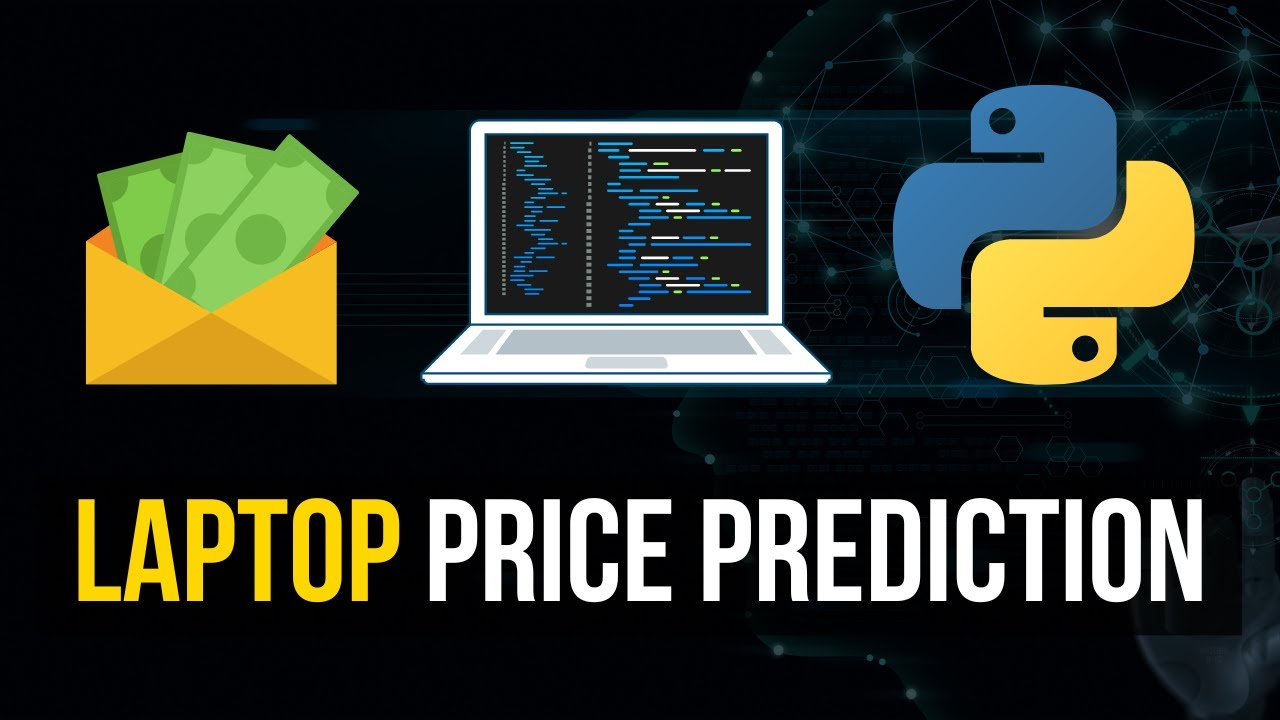

In [1]:
#loading the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import squarify
import scipy.stats as stats

In [2]:
df=pd.read_csv('/home/hussain/Downloads/Regression_projects/laptop prediction/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [7]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
dup_rows,dup_col=df[df.duplicated()].shape
dup_rows

29

In [11]:
dup_col

11

In [12]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
df[df.duplicated()].shape

(0, 11)

# Exploratory Data Anlaysis(EDA) and Feature Engineering

In [14]:
#checking the dtype of columns to be string 
df_feat=[i for i in df.columns if df[i].dtype=='O']
df_feat

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

(0.0, 100.0, 0.0, 100.0)

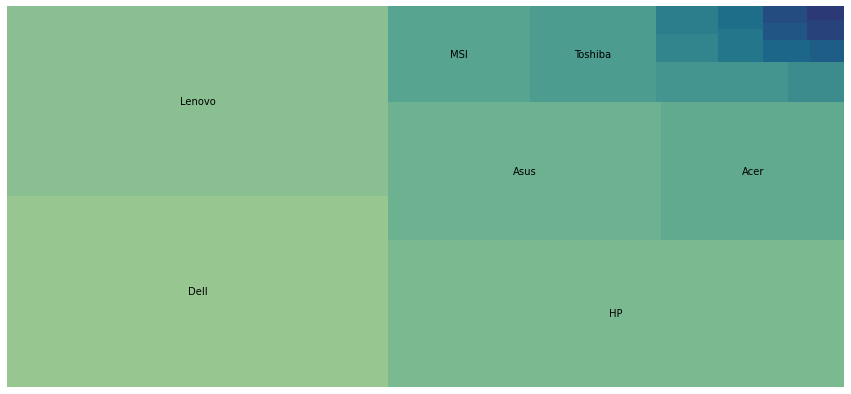

In [15]:
#Tree map representation of laptop brands
plt.figure(figsize=(15,7))
val=df['Company'].value_counts().values
indx=df['Company'].value_counts().index
squarify.plot(val,label=indx[:7],color=sns.color_palette('crest',len(val)))
plt.axis('off')

# Observation:
DELL LENOVO and HP are the most sold Laptops among their competitors.

Text(0, 0.5, 'Count')

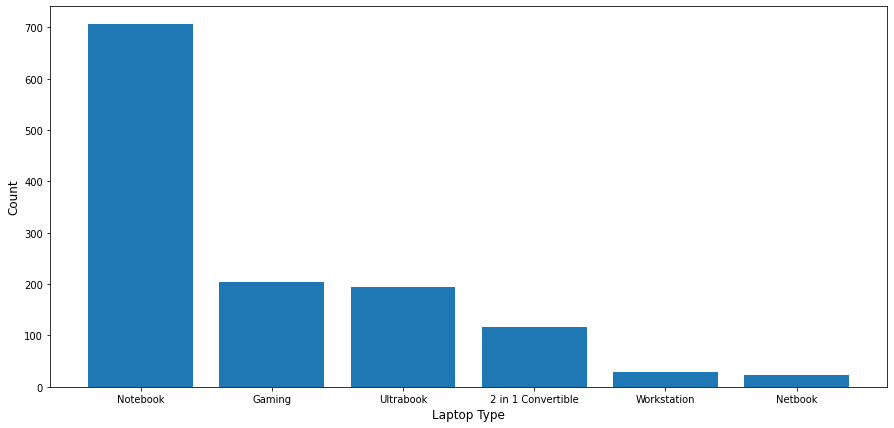

In [16]:
#Barchart Representation of laptop counts
plt.figure(figsize=(15,7))
plt.bar(x=df['TypeName'].value_counts().index,height=df['TypeName'].value_counts().values)
plt.xlabel('Laptop Type',fontsize=12)
plt.ylabel('Count',fontsize=12)

Observations:
Most of the Laptop types are 'Notebook' followed by 'Gaming' and then 'Ultrabook' type.

In [17]:
# Top 10 laptop screen specification used by the laptop companies
ind2=df.ScreenResolution.value_counts(normalize=False).index[:11]
val2=df.ScreenResolution.value_counts(normalize=False).values[:11]

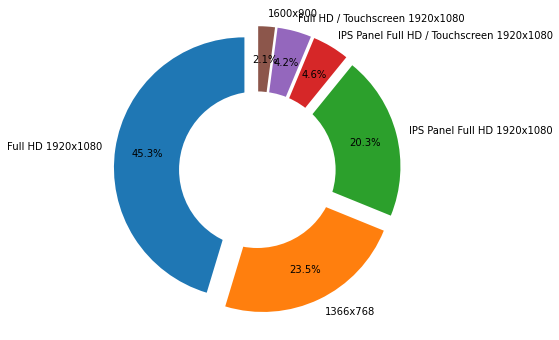

In [43]:
plt.figure(figsize=(6,6))
sizes=df.ScreenResolution.value_counts(normalize=False)[:6]
label=df.ScreenResolution.value_counts(normalize=False).index[:6]
myexplode=[0.1 for i in range(0,len(sizes))]
plt.pie(sizes,labels=label,autopct='%1.1f%%',startangle=90,pctdistance=0.75,explode=myexplode)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# plt.rcParams["figure.figsize"] = (15,7)
# plt.pie(x=val2,labels=ind2,autopct='%1.1f%%',startangle=90,pctdistance=0.75,explode=(0.025,0.025))
# centre_circle=plt.Circle((0,0),0.6,fc='white')
# fig=plt.gcf()
# fig.gca().add_artist(centre_circle)
# plt.show()

# Observations:
Most of the Laptop uses screen resolution of 'Full HD 1920x1080','IPS Panel Full HD 1920x1080' and '1366x768'.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]),
 [Text(0, 0, 'Intel Core i5 7200U 2.5GHz'),
  Text(1, 0, 'Intel Core i7 7700HQ 2.8GHz'),
  Text(2, 0, 'Intel Core i7 7500U 2.7GHz'),
  Text(3, 0, 'Intel Core i7 8550U 1.8GHz'),
  Text(4, 0, 'Intel Core i5 8250U 1.6GHz'),
  Text(5, 0, 'Intel Core i5 6200U 2.3GHz'),
  Text(6, 0, 'Intel Core i3 6006U 2GHz'),
  Text(7, 0, 'Intel C

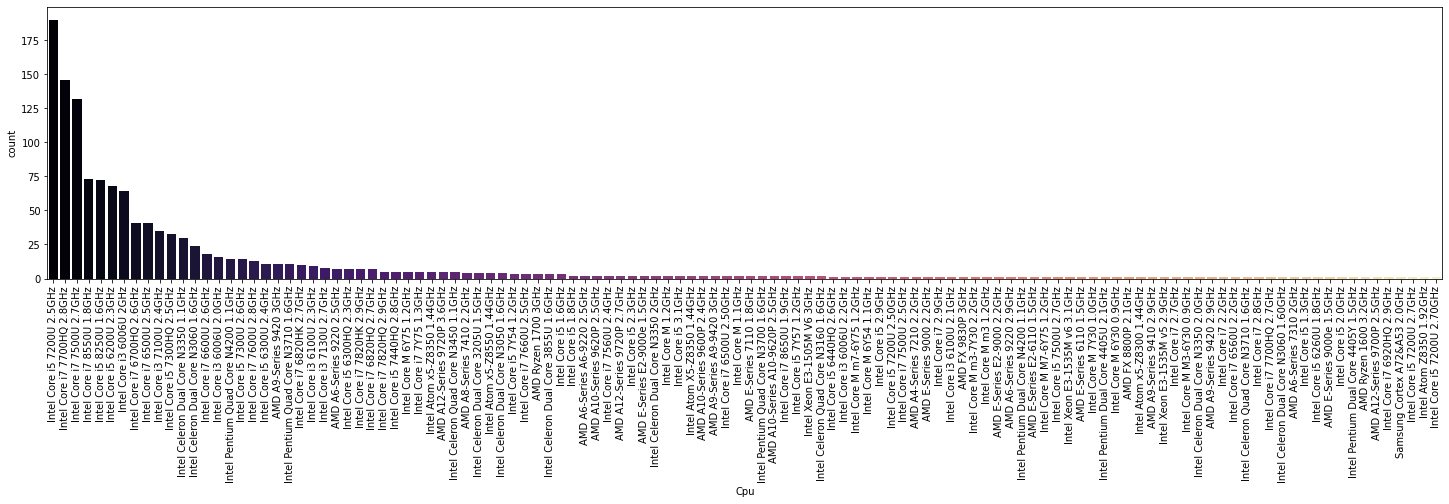

In [19]:
#Bar chart of CPU counts
plt.figure(figsize=(25,5))
ind3=df.Cpu.value_counts().index
sns.countplot(x='Cpu',data=df,order=ind3,palette=sns.color_palette('magma',len(ind3)))
plt.xticks(rotation=90)

Observation
we can observe that most of the cpus belongs to Intel.

In [44]:
val=df['Ram'].value_counts().values
ind=df['Ram'].value_counts().index

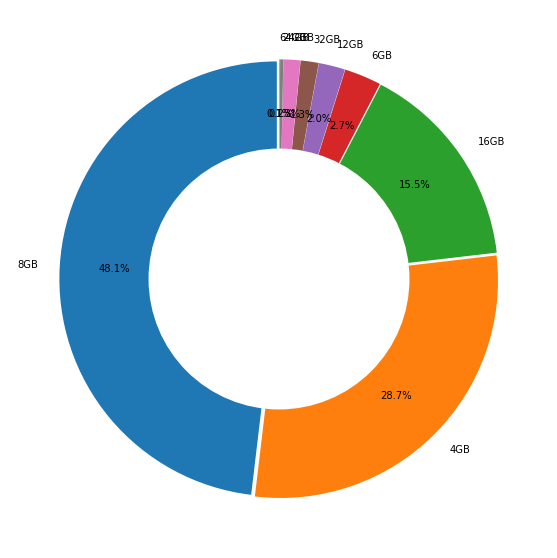

In [49]:
plt.figure(figsize=(10,10))
myexplode=[0.01 for i in range(0,len(val))]
plt.pie(x=val,labels=ind,autopct='%1.1f%%',startangle=90,pctdistance=0.75,explode=myexplode)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Observation:
Most of the laptops belongs to 8GB RAM followed by 4GB and then 15GB.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '256GB SSD'),
  Text(1, 0, '1TB HDD'),
  Text(2, 0, '500GB HDD'),
  Text(3, 0, '512GB SSD'),
  Text(4, 0, '128GB SSD +  1TB HDD'),
  Text(5, 0, '128GB SSD'),
  Text(6, 0, '256GB SSD +  1TB HDD'),
  Text(7, 0, '32GB Flash Storage'),
  Text(8, 0, '2TB HDD'),
  Text(9, 0, '1TB SSD'),
  Text(10, 0, '512GB SSD +  1TB HDD'),
  Text(11, 0, '64GB Flash Storage'),
  Text(12, 0, '256GB SSD +  2TB HDD'),
  Text(13, 0, '256GB Flash Storage'),
  Text(14, 0, '1.0TB Hybrid'),
  Text(15, 0, '16GB Flash Storage'),
  Text(16, 0, '32GB SSD'),
  Text(17, 0, '180GB SSD'),
  Text(18, 0, '128GB Flash Storage'),
  Text(19, 0, '16GB SSD'),
  Text(20, 0, '512GB SSD +  2TB HDD'),
  Text(21, 0, '256GB SSD +  500GB HDD'),
  Text(22, 0, '512GB Flash Storage'),
  Text(23, 0, '1TB SSD +  1TB HDD'),
  Text(24, 0, '256GB SSD + 

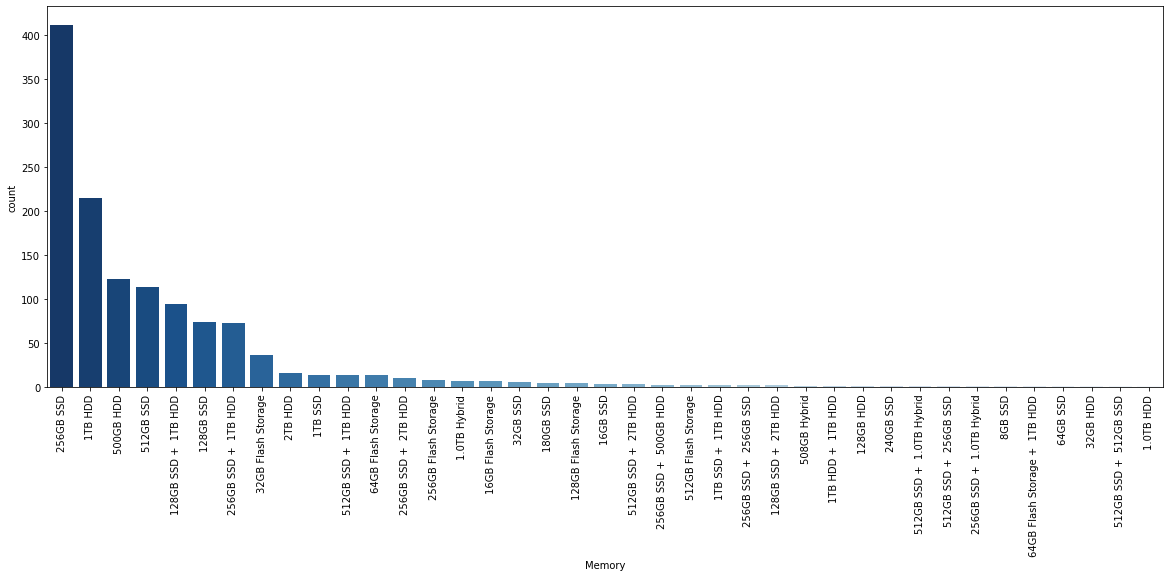

In [22]:
plt.figure(figsize=(20,7))
ind=df.Memory.value_counts().index
sns.countplot(data=df,x='Memory',order=ind,palette=sns.color_palette('Blues_r',len(ind)))
plt.xticks(rotation=90)

Obdervation:
Mainly there are 4 types of storages-->SSD,HDD,Flash storage and Hybrid 

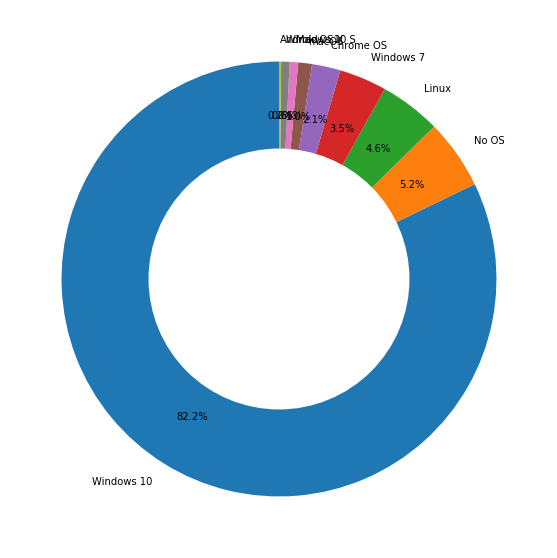

In [50]:

plt.figure(figsize=(10,10))
plt.pie(x=df['OpSys'].value_counts().values,labels=df['OpSys'].value_counts().index,autopct='%1.1f%%',
        startangle=90,pctdistance=0.75)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Observation:
82% percent of the laptops runs with Windows 10 OS folowed by Linux and windows7

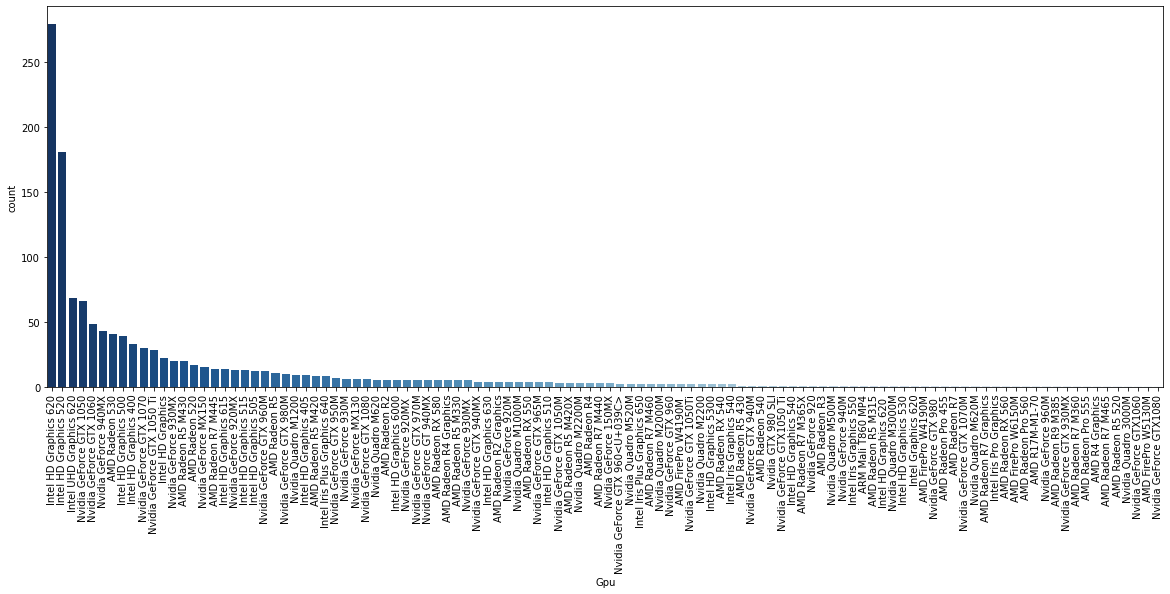

In [24]:
plt.figure(figsize=(20,7))
ind=df['Gpu'].value_counts().index
sns.countplot(x='Gpu',data=df,order=ind,palette=sns.color_palette('Blues_r',len(ind)))
plt.xticks(rotation=90);

In [25]:
gpu_data=df['Gpu'].apply(lambda x:x.split(' ')[0]).value_counts()
gpu_data

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [26]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [27]:
a=df.copy()
a['Weight']=a['Weight'].apply(lambda x:x.replace('kg',''))
a['Weight']=a['Weight'].astype(float)

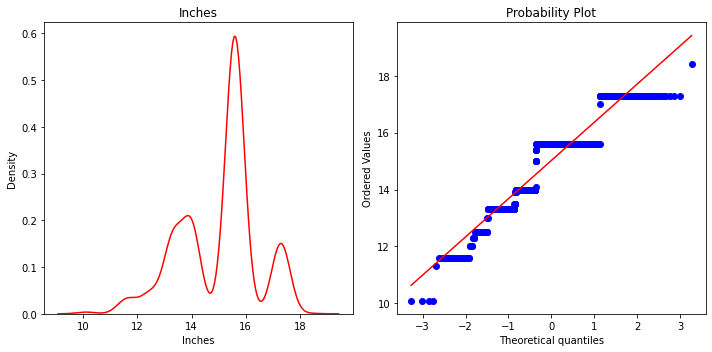

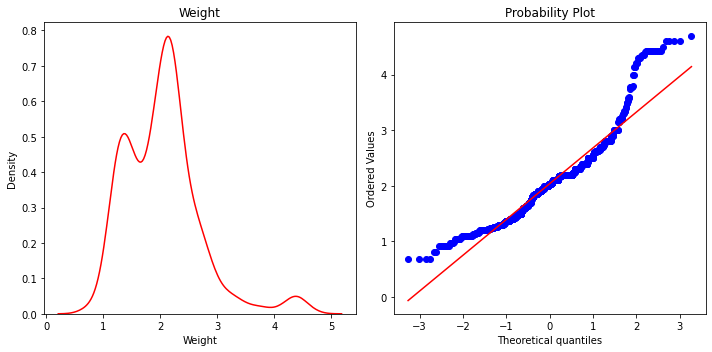

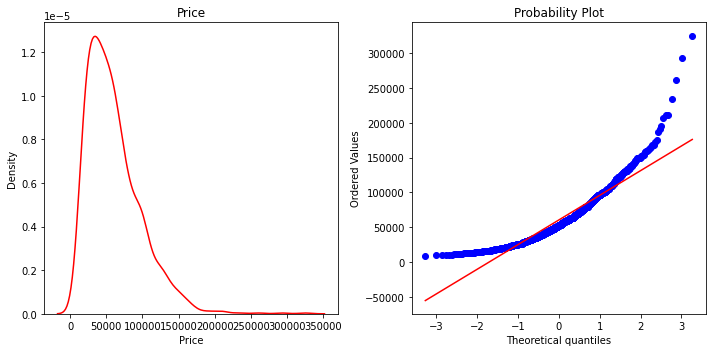

In [28]:
for feature in ['Inches','Weight','Price']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(feature)
    sns.kdeplot(data=a,x=feature,color='red')
    plt.tight_layout()
    plt.subplot(1,2,2)
    plt.title('Q_Q_plot-'+feature)
    stats.probplot(a[feature],dist='norm',plot=plt)
    plt.tight_layout()

In [29]:
c=df.groupby('Company')['Price'].mean().sort_values(ascending=False).reset_index()
c

,Company,Price
0,Razer,178282.491429
1,LG,111834.720000
2,MSI,92116.226133
3,Google,89386.080000
4,Microsoft,85903.788000
5,Apple,83340.499886
6,Huawei,75870.720000
7,Samsung,75308.320000
8,Toshiba,67549.050000
9,Dell,63894.714408


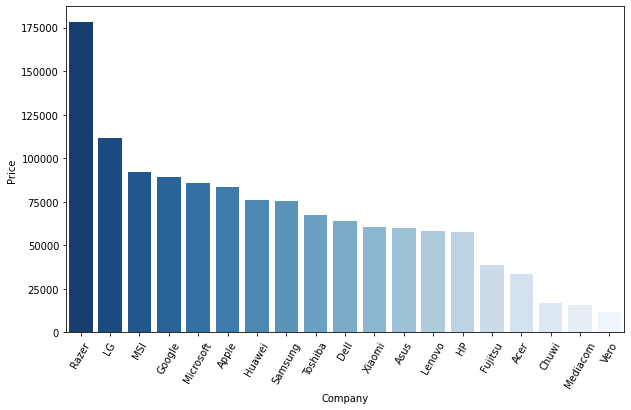

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=c,x='Company',y='Price',palette=sns.color_palette('Blues_r',c.shape[0]))
plt.xticks(rotation=60);

In [31]:
c=df.groupby('TypeName')['Price'].mean().sort_values(ascending=False).reset_index()
c

,TypeName,Price
0,Workstation,121497.525683
1,Gaming,92247.960187
2,Ultrabook,82939.698928
3,2 in 1 Convertible,68715.990154
4,Notebook,42055.998976
5,Netbook,35877.825391


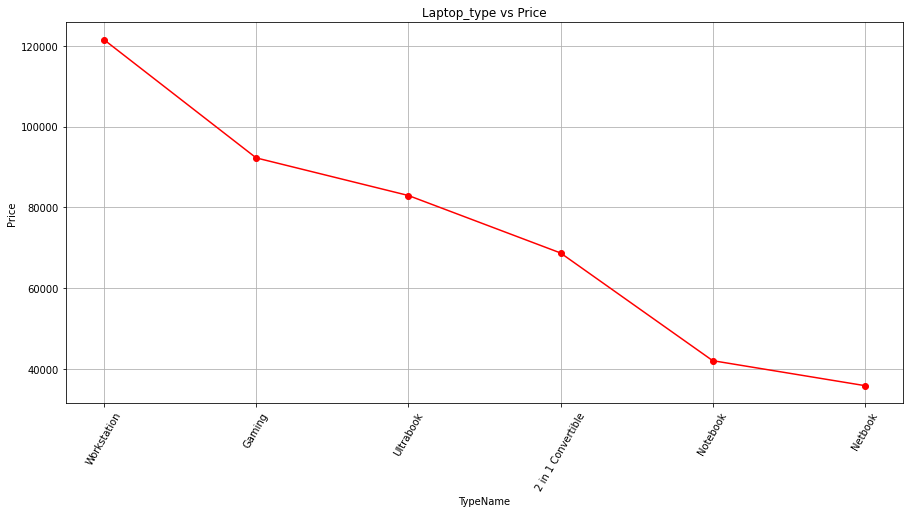

In [32]:
plt.plot(c['TypeName'],c['Price'],marker='o',color='red')
plt.title('Laptop_type vs Price')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.xticks(rotation=60)
plt.grid()

# Observation:
Price of the Laptop are the highest among Worksation type laptops followed by Gaming and ultrabook type.

# Modifying Screen resolution Feature

In [52]:
a=df.copy()
f=a['ScreenResolution'].value_counts(normalize=True)*100
m=a['ScreenResolution'].map(f)
a['ScreenResolution']=a['ScreenResolution'].mask(m<1,'less')
a

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,less,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,less,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,less,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [53]:
ind=a['ScreenResolution'].value_counts().index
val=a['ScreenResolution'].value_counts().values

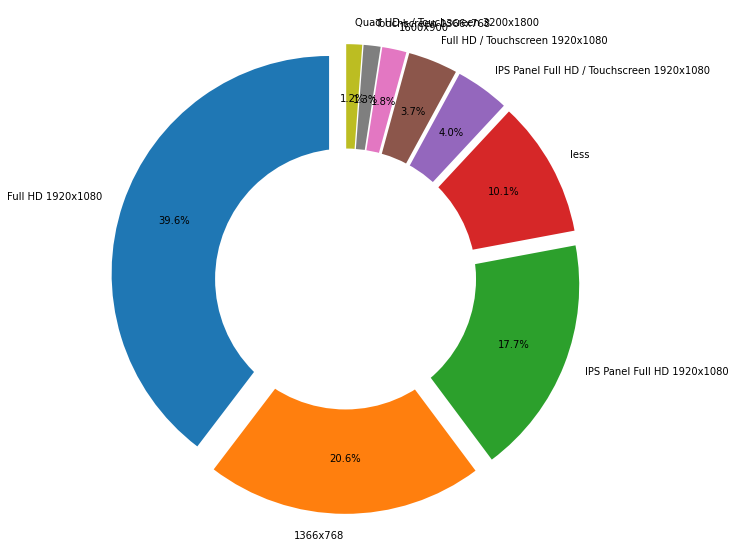

In [55]:
plt.figure(figsize=(10,10))
myexplode=[0.08 for i in range(0,len(val))]
plt.pie(x=val,labels=ind,autopct='%1.1f%%',startangle=90,pctdistance=0.75,explode=myexplode)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [36]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Modyfying CPU features

In [37]:
def core(x):
    import re
    a=re.findall('i\d{1}',x)
    if len(a)!=0:
        return a[0]
    else:
        return 'other'
def freq(x):
    import re
    a=re.findall('\d\.\d+',x)
    if len(a)!=0:
        return a[0]
    else:
        return 0
def proc(x):
    import re
    a=re.findall('I\S+l',x)
    if len(a)!=0:
        return a[0]
    else:
        return 'other'
        

In [38]:
a['Core']=a['Cpu'].apply(core)
a['Freq']=a['Cpu'].apply(freq)
a['proc_b']=a['Cpu'].apply(proc)

In [39]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,Freq,proc_b
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,i5,2.5,Intel


(array([0, 1, 2, 3]),
 [Text(0, 0, 'i7'), Text(1, 0, 'i5'), Text(2, 0, 'other'), Text(3, 0, 'i3')])

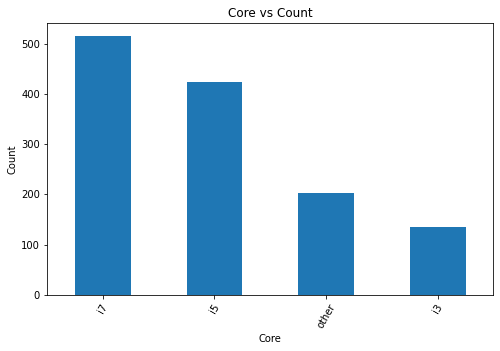

In [40]:
plt.figure(figsize=(8,5))
a.Core.value_counts().plot(kind='bar')
plt.title('Core vs Count')
plt.xlabel('Core')
plt.ylabel('Count')
plt.xticks(rotation=60)

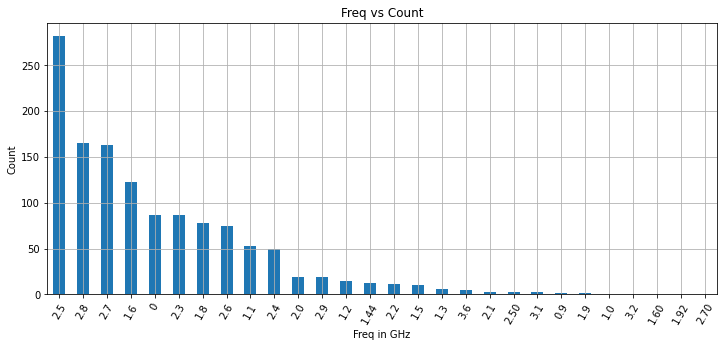

In [41]:
plt.figure(figsize=(12,5))
a.Freq.value_counts().plot(kind='bar')
plt.title('Freq vs Count')
plt.xlabel('Freq in GHz')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.grid()

Text(0, 0.5, 'Count')

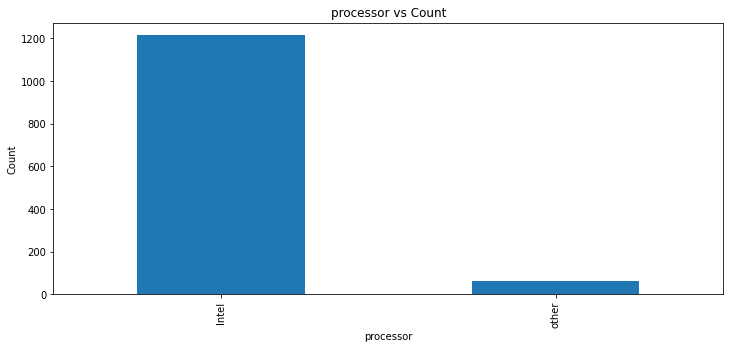

In [42]:
plt.figure(figsize=(12,5))
a.proc_b.value_counts().plot(kind='bar')
plt.title('processor vs Count')
plt.xlabel('processor')
plt.ylabel('Count')

# Observation:
We can see that 'processor' feature is skewed to the value "Intel.So tho=is column have least dependancies with the target values.

In [43]:
a['Ram']=a['Ram'].apply(lambda x:x.replace('GB',''))
a['Ram']=a['Ram'].astype('float64')
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,Freq,proc_b
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,i5,2.5,Intel


Modyfying Memory Feature

In [44]:
a['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [45]:
def extract_ssd(x):
    a=x.split('+')
    for i in a:
        if 'SSD' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('SSD','')
            c=int(m.strip())
            if c==1:
                c=1000
            return c
def extract_hdd(x):
    a=x.split('+')
    for i in a:
        if 'HDD' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('HDD','')
            c=int(float(m.strip()))
            if c==1:
                c=1000
            return c
def extract_flash(x):
    a=x.split('+')
    for i in a:
        if 'Flash Storage' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('Flash Storage','')
            c=int(float(m.strip()))
            if c==1:
                c=1000
            return c
def extract_hybrid(x):
    a=x.split('+')
    for i in a:
        if 'Hybrid' in i:
            y=i.strip().replace('TB','')
            z=y.replace('GB','')
            m=z.replace('Hybrid','')
            c=int(float(m.strip()))
            if c==1:
                c=1000
            return c

In [46]:
a['SSD']=a['Memory'].apply(extract_ssd)
a['HDD']=a['Memory'].apply(extract_hdd)
a['Flash_Storage']=a['Memory'].apply(extract_flash)
a['Hybrid']=a['Memory'].apply(extract_hybrid)


In [47]:
a.fillna(0,inplace=True)
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,Freq,proc_b,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '256.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '128.0'),
  Text(3, 0, '512.0'),
  Text(4, 0, '1000.0'),
  Text(5, 0, '32.0'),
  Text(6, 0, '180.0'),
  Text(7, 0, '16.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '240.0'),
  Text(10, 0, '64.0')])

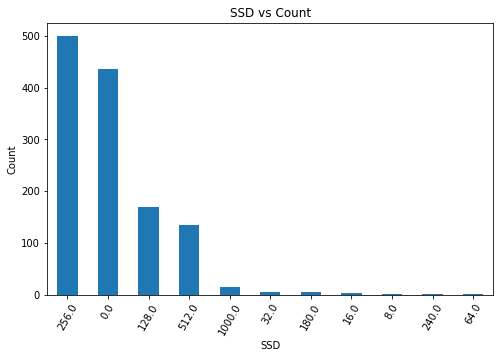

In [48]:
plt.figure(figsize=(8,5))
a.SSD.value_counts().plot(kind='bar')
plt.title('SSD vs Count')
plt.xlabel('SSD')
plt.ylabel('Count')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1000.0'),
  Text(2, 0, '500.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '128.0'),
  Text(5, 0, '32.0')])

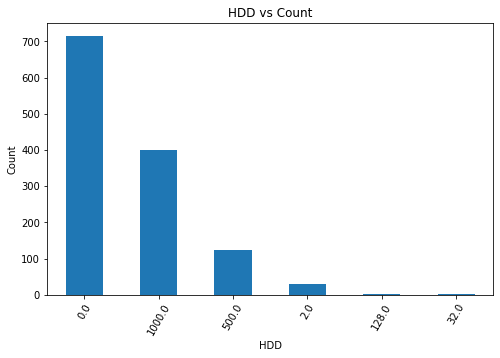

In [49]:
plt.figure(figsize=(8,5))
a.HDD.value_counts().plot(kind='bar')
plt.title('HDD vs Count')
plt.xlabel('HDD')
plt.ylabel('Count')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '32.0'),
  Text(2, 0, '64.0'),
  Text(3, 0, '256.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '128.0'),
  Text(6, 0, '512.0')])

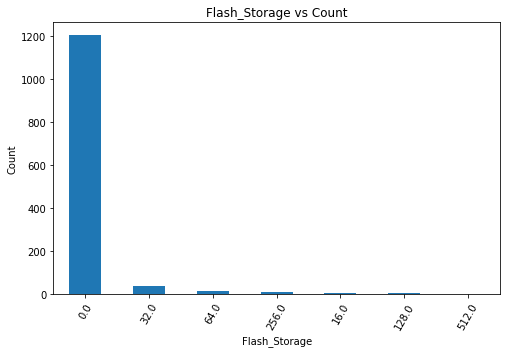

In [50]:
plt.figure(figsize=(8,5))
a.Flash_Storage.value_counts().plot(kind='bar')
plt.title('Flash_Storage vs Count')
plt.xlabel('Flash_Storage')
plt.ylabel('Count')
plt.xticks(rotation=60)

(array([0, 1, 2]),
 [Text(0, 0, '0.0'), Text(1, 0, '1000.0'), Text(2, 0, '508.0')])

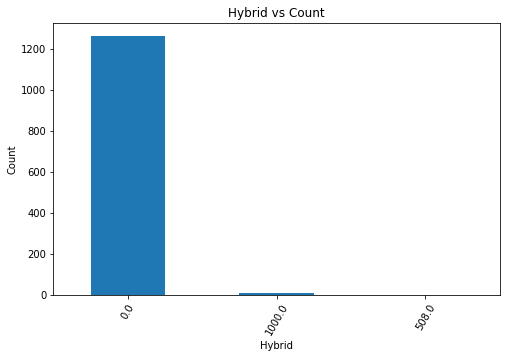

In [51]:
plt.figure(figsize=(8,5))
a.Hybrid.value_counts().plot(kind='bar')
plt.title('Hybrid vs Count')
plt.xlabel('Hybrid')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Modifying GPU Feature

In [52]:
a['Gpu']=a['Gpu'].apply(lambda x:x.split()[0])

In [53]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,Freq,proc_b,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel,macOS,1.37kg,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel,macOS,1.34kg,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel,No OS,1.86kg,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


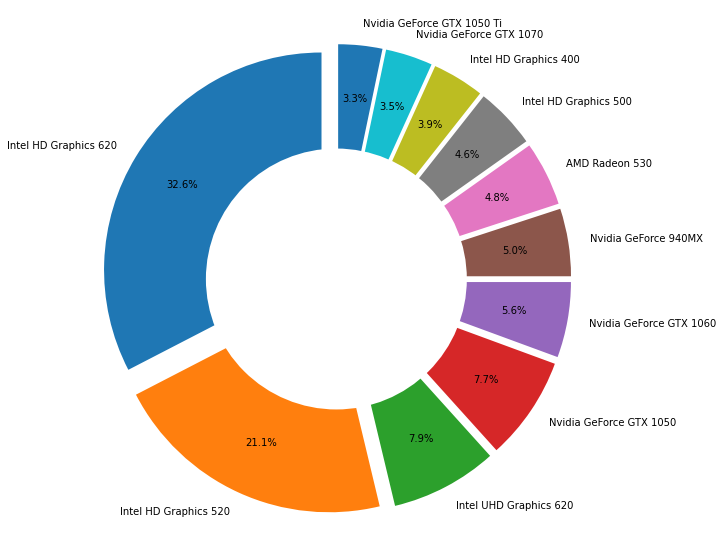

In [57]:
plt.figure(figsize=(10,10))
val=a.Gpu.value_counts().values[:11]
ind=a.Gpu.value_counts().index[:11]
myexplode=[0.08 for i in range(0,len(val))]
plt.pie(x=val,labels=ind,autopct='%1.1f%%',startangle=90,pctdistance=0.75,explode=myexplode)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Modifying Operating System Feature

In [55]:
def os_rep(x):
    import re
    if re.search('w.*',x.lower()):
        return 'windows'
    if re.search('mac.*',x.lower()):
        return 'mac'
    if re.search('chr.*',x.lower()):
        return 'chrome'
    if re.search('lin.*',x.lower()):
        return 'linux'
    else:
        return 'other'

In [56]:
a['OpSys']=a['OpSys'].apply(os_rep)
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Core,Freq,proc_b,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,less,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel,mac,1.37kg,71378.6832,i5,2.3,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel,mac,1.34kg,47895.5232,i5,1.8,Intel,0.0,0.0,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel,other,1.86kg,30636.0000,i5,2.5,Intel,256.0,0.0,0.0,0.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'windows'),
  Text(1, 0, 'other'),
  Text(2, 0, 'linux'),
  Text(3, 0, 'chrome'),
  Text(4, 0, 'mac')])

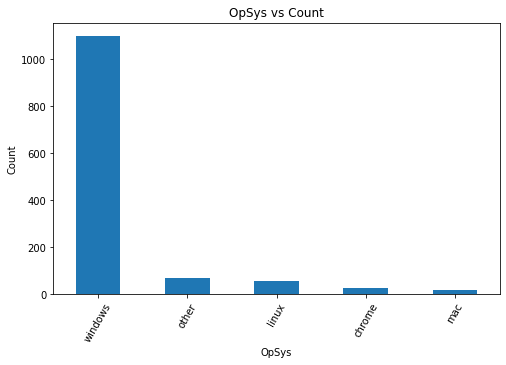

In [57]:
plt.figure(figsize=(8,5))
a.OpSys.value_counts().plot(kind='bar')
plt.title('OpSys vs Count')
plt.xlabel('OpSys')
plt.ylabel('Count')
plt.xticks(rotation=60)

In [58]:
#Modifying Weight feature 

In [59]:
a['Weight']=a['Weight'].apply(lambda x:x.replace('kg',''))
a['Weight']=a['Weight'].astype('float64')

<AxesSubplot:xlabel='Weight', ylabel='Price'>

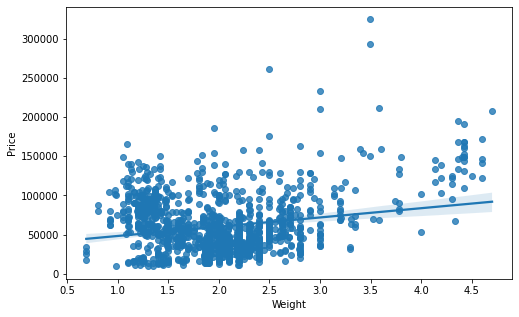

In [60]:
plt.figure(figsize=(8,5))
sns.regplot(data=a,x='Weight',y='Price')

In [61]:
a.drop(['Cpu','Memory','Hybrid'],axis=1,inplace=True)

In [62]:
a.head(3)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Core,Freq,proc_b,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,71378.6832,i5,2.3,Intel,128.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.34,47895.5232,i5,1.8,Intel,0.0,0.0,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,8.0,Intel,other,1.86,30636.0000,i5,2.5,Intel,256.0,0.0,0.0


In [63]:
x=a.drop(['Price'],axis=1)
y=a.iloc[:,8]

In [64]:
x.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Core,Freq,proc_b,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,i5,2.3,Intel,128.0,0.0,0.0
1,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.34,i5,1.8,Intel,0.0,0.0,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,8.0,Intel,other,1.86,i5,2.5,Intel,256.0,0.0,0.0
3,Apple,Ultrabook,15.4,less,16.0,AMD,mac,1.83,i7,2.7,Intel,512.0,0.0,0.0
4,Apple,Ultrabook,13.3,less,8.0,Intel,mac,1.37,i5,3.1,Intel,256.0,0.0,0.0


# Observations:
Here OneHotEncoding is to be done to the columns==> 'Company','TypeName','ScreenResolution', 'Gpu','OpSys','proc_b'
Ordinal Encoding is to be done in 'Core'column
Standard scaling is to be done in numerical columns i.e columns==> 'Inches','Ram','Weight','Freq','SSD','HDD', 'Flash_Storage'

In [65]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1269     38378.6496
1270     33992.6400
1271     79866.7200
1272     12201.1200
1273     40705.9200
Name: Price, Length: 1274, dtype: float64

In [66]:
#we use Column Transformer method for encoding nominal ordinal adn standard scaling process done in a single go.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


In [67]:
col_trans=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,5,6,10]),
    ('oe',OrdinalEncoder(categories=[['other','i3','i5','i7']]),['Core']),
    ('se',StandardScaler(),[2,4,7,9,11,12,13])],remainder='passthrough')

In [68]:
x=col_trans.fit_transform(x)

In [69]:
x.shape

(1274, 47)

# Model Creation

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
xtrain.shape

(891, 47)

In [71]:
xtest.shape

(383, 47)

In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

/home/hussain/.local/lib/python3.6/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [73]:
models=[LinearRegression(),Ridge(alpha=0.01,max_iter=1500),Lasso(alpha=2,max_iter=1500),AdaBoostRegressor(),XGBRegressor(),RandomForestRegressor(n_estimators=150,min_samples_split=6,max_features=20,max_samples=700,max_depth=18)]
for i in models:
    model=i
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    score=r2_score(ytest,ypred)
    print("R2_Score for ",model,"%0.3f" % score, end="\n")

R2_Score for  LinearRegression() 0.744
R2_Score for  Ridge(alpha=0.01, max_iter=1500) 0.743
R2_Score for  Lasso(alpha=2, max_iter=1500) 0.745
R2_Score for  AdaBoostRegressor() 0.657
R2_Score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 0.838
R2_Score for  RandomForestRegressor(max_depth=18, max_features=20, max_samples=700,
                      min_samples_split=6, n_estimators=150) 0.807


# Observation:
here we got highest r2score for XGBRegressor() and the r2score is 0.838

In [74]:
model=XGBRegressor()

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)


In [77]:
xgb_grid.fit(xtrain,ytrain)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[22:13:11] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:11] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [78]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [80]:
ypred_grid=xgb_grid.predict(xtest)
score_grid=r2_score(ytest,ypred_grid)
score_grid

0.8418608863248724

# Observation: 
r2 score Increased from 0.83 to 0.84 with tuning